<a href="https://colab.research.google.com/github/ADEGBOYEGA123/-ADEGBOYEGA123-.github.io/blob/main/Image_segementor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
image_width=128
image_height=128
image_channels=3

In [3]:
#Build model

#contractive path :
inputs=tf.keras.layers.Input((image_width,image_height,image_channels))

#input normalization
normalization=tf.keras.layers.Lambda(lambda x: x/255)(inputs)

#first convolution layer
conv1=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same',strides=1)(normalization)
conv1_dropout=tf.keras.layers.Dropout(0.1)(conv1)
conv1_=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(conv1_dropout)
conv1_maxpool=tf.keras.layers.MaxPooling2D((2,2),padding='same')(conv1_)

#second convolution layer
conv2=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same',strides=1)(conv1_maxpool)
conv2_dropout=tf.keras.layers.Dropout(0.1)(conv2)
conv2_=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(conv2_dropout)
conv2_maxpool=tf.keras.layers.MaxPooling2D((2,2))(conv2_)

#third convolution layer
conv3=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(conv2_maxpool)
conv3_dropout=tf.keras.layers.Dropout(0.1)(conv3)
conv3_=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(conv3_dropout)
conv3_maxpool=tf.keras.layers.MaxPooling2D((2,2))(conv3_)

#fourth convolution layer
conv4=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='SAME')(conv3_maxpool)
conv4_dropout=tf.keras.layers.Dropout(0.2)(conv4)
conv4_=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='SAME')(conv4_dropout)
conv4_maxpool=tf.keras.layers.MaxPooling2D((2,2))(conv4_)

#fifth convolution layer
conv5=tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='SAME')(conv4_maxpool)
conv5_dropout=tf.keras.layers.Dropout(0.1)(conv5)
conv5_=tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='SAME')(conv5_dropout)



#upsample: expansive path:

#sixth convolution layer
upsample6=tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding='same')(conv5_)
upsample6_=tf.keras.layers.concatenate([upsample6,conv4_])
conv6=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='SAME')(upsample6_)
conv6_dropout=tf.keras.layers.Dropout(0.2)(conv6)
conv6_=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='SAME')(conv6_dropout)

#seventh convolution layer
upsample7=tf.keras.layers.Conv2DTranspose(64,(2,2),strides=(2,2),padding='same')(conv6_)
upsample7_=tf.keras.layers.concatenate([upsample7,conv3_])
conv7=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='SAME')(upsample7_)
conv7_dropout=tf.keras.layers.Dropout(0.2)(conv7)
conv7_=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='SAME')(conv7_dropout)

#eighth convolution layer
upsample8=tf.keras.layers.Conv2DTranspose(32,(2,2),strides=(2,2),padding='same')(conv7_)
upsample8_=tf.keras.layers.concatenate([upsample8,conv2_])
conv8=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='SAME')(upsample8_)
conv8_dropout=tf.keras.layers.Dropout(0.1)(conv8)
conv8_=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='SAME')(conv8_dropout)

#ninth convolution layer
upsample9=tf.keras.layers.Conv2DTranspose(16,(2,2),strides=(2,2),padding='same')(conv8_)
upsample9_=tf.keras.layers.concatenate([upsample9,conv1_],axis=3)
conv9=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='SAME')(upsample9_)
conv9_dropout=tf.keras.layers.Dropout(0.1)(conv9)
conv9_=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='SAME')(conv9_dropout)


outputs=tf.keras.layers.Conv2D(1,(1,1),activation='sigmoid')(conv9_)

model=tf.keras.Model(inputs=[inputs],outputs=[outputs])

early_stopping=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

#tensor_board_logs=tf.keras.callbacks.TensorBoard(TensorAlgorithms.TensorBoardRunLog().log_directory())

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#model.summary()




In [ ]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

In [5]:
def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) /1
  input_mask -= 1
  return input_image, input_mask

In [6]:
def load_image(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(
    datapoint['segmentation_mask'],
    (128, 128),
    method = tf.image.ResizeMethod.NEAREST_NEIGHBOR,
  )

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [7]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [8]:
train_images = dataset['train'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
test_images = dataset['test'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)

In [9]:
class Augment(tf.keras.layers.Layer):
  def __init__(self, seed=42):
    super().__init__()
    # both use the same seed, so they'll make the same random changes.
    self.augment_inputs = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)
    self.augment_labels = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)
  
  def call(self, inputs, labels):
    inputs = self.augment_inputs(inputs)
    labels = self.augment_labels(labels)
    return inputs, labels

In [10]:
train_batches = (
    train_images
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .map(Augment())
    .prefetch(buffer_size=tf.data.AUTOTUNE))

test_batches = test_images.batch(BATCH_SIZE)

In [23]:
import matplotlib.pyplot as plt
import PIL
import numpy as np
class DisplayCallback(tf.keras.callbacks.Callback):

  def __init__(self):

    self.__num_results=None
  
  def show_predictions(self):

    import matplotlib.pyplot as plt

    image=train_images.take(self.__num_results)
    
    titles=['Image','Expected mask','Predicted Mask']

    for i in image:

      fig=plt.figure(1,figsize=(10,10))

      predictions=(np.array(model.predict(np.array(i[0]).reshape(1,128,128,3))).flatten()).reshape(128,128,1)

      for pos in range(len(i)):

        ax=fig.add_subplot(1,3,pos+1)
        
        ax.imshow(tf.keras.utils.array_to_img(i[pos]))
      
      ax=fig.add_subplot(1,3,pos+2)
      
      ax.imshow(tf.keras.utils.array_to_img(predictions))

    plt.show()

  def on_epoch_end(self, epoch, logs=None,num_results=1):

    self.__num_results=num_results

    self.show_predictions()
  
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))
    print('.....................................................')



Epoch 1/10
1/1 [==============================] - 0s 64ms/step


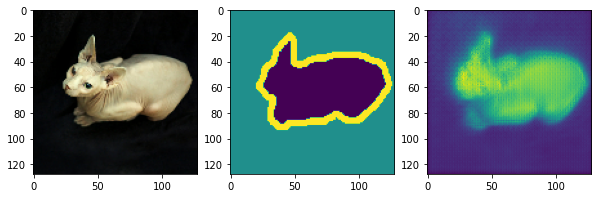


Sample Prediction after epoch 1

.....................................................
1/1 [==============================] - 25s 25s/step - loss: 0.4779 - accuracy: 0.5984 - val_loss: 0.5110 - val_accuracy: 0.5812
Epoch 2/10
1/1 [==============================] - 0s 70ms/step


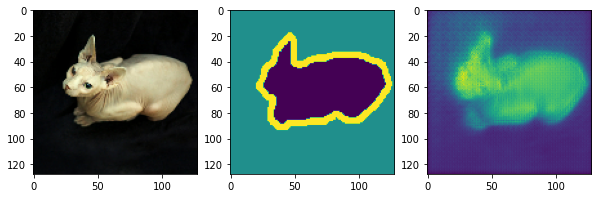


Sample Prediction after epoch 2

.....................................................
1/1 [==============================] - 17s 17s/step - loss: 0.4829 - accuracy: 0.5942 - val_loss: 0.4989 - val_accuracy: 0.5812
Epoch 3/10
1/1 [==============================] - 0s 67ms/step


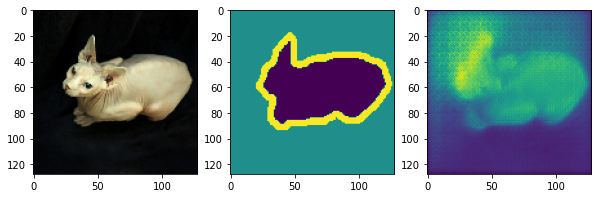


Sample Prediction after epoch 3

.....................................................
1/1 [==============================] - 17s 17s/step - loss: 0.4965 - accuracy: 0.5682 - val_loss: 0.4647 - val_accuracy: 0.5812
Epoch 4/10
1/1 [==============================] - 0s 73ms/step


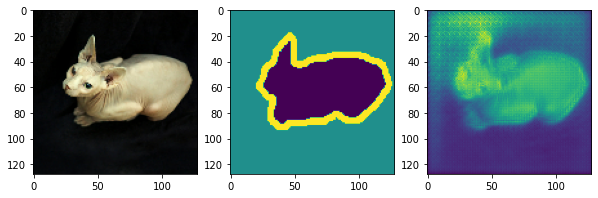


Sample Prediction after epoch 4

.....................................................
1/1 [==============================] - 18s 18s/step - loss: 0.4429 - accuracy: 0.6042 - val_loss: 0.4821 - val_accuracy: 0.5812
Epoch 5/10
1/1 [==============================] - 0s 72ms/step


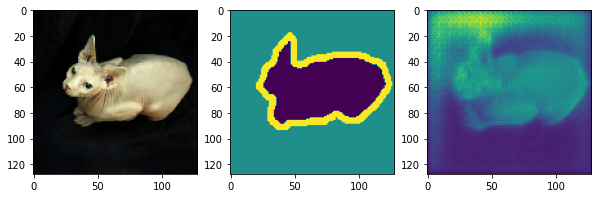


Sample Prediction after epoch 5

.....................................................
1/1 [==============================] - 17s 17s/step - loss: 0.4794 - accuracy: 0.5505 - val_loss: 0.4667 - val_accuracy: 0.5812
Epoch 6/10
1/1 [==============================] - 0s 68ms/step


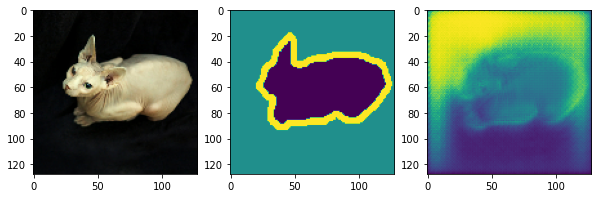


Sample Prediction after epoch 6

.....................................................
1/1 [==============================] - 17s 17s/step - loss: 0.3653 - accuracy: 0.6416 - val_loss: 0.3754 - val_accuracy: 0.5812
Epoch 7/10
1/1 [==============================] - 0s 69ms/step


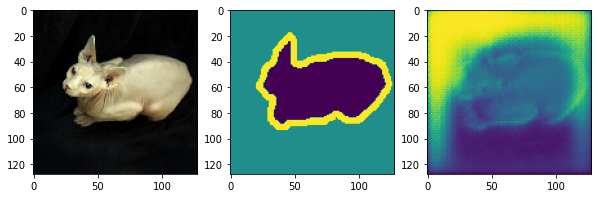


Sample Prediction after epoch 7

.....................................................
1/1 [==============================] - 18s 18s/step - loss: 0.4259 - accuracy: 0.5677 - val_loss: 0.3702 - val_accuracy: 0.5812
Epoch 8/10
1/1 [==============================] - 0s 70ms/step


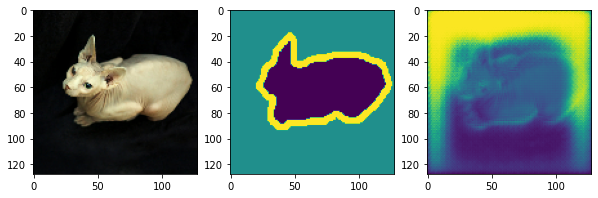


Sample Prediction after epoch 8

.....................................................
1/1 [==============================] - 17s 17s/step - loss: 0.3449 - accuracy: 0.5656 - val_loss: 0.3505 - val_accuracy: 0.5812
Epoch 9/10
1/1 [==============================] - 0s 68ms/step


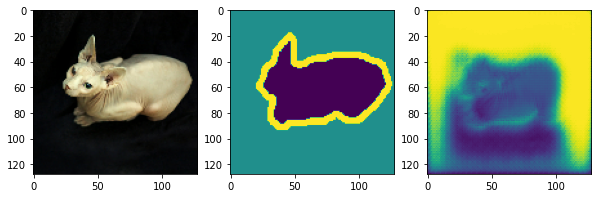


Sample Prediction after epoch 9

.....................................................
1/1 [==============================] - 17s 17s/step - loss: 0.2445 - accuracy: 0.6481 - val_loss: 0.2769 - val_accuracy: 0.5812
Epoch 10/10
1/1 [==============================] - 0s 125ms/step


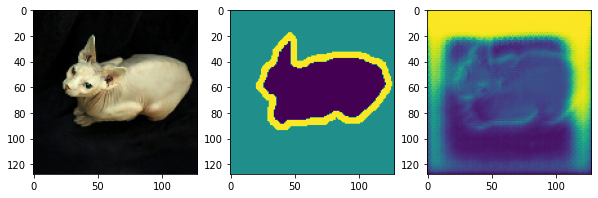


Sample Prediction after epoch 10

.....................................................
1/1 [==============================] - 18s 18s/step - loss: 0.4291 - accuracy: 0.5790 - val_loss: 0.2972 - val_accuracy: 0.5812


In [24]:
np.random.seed(45)
history=model.fit(train_batches,validation_data=test_batches,epochs=10,steps_per_epoch=1,validation_steps=1,callbacks=[DisplayCallback(),early_stopping])

In [25]:
model.save('first_image_segementor.h5')

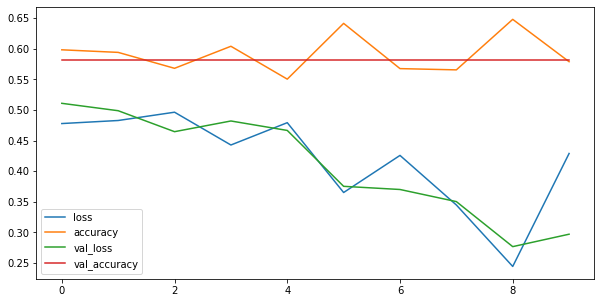

In [26]:
import pandas as pd
history_data=pd.DataFrame(history.history).plot(figsize=(10,5))

1/1 [==============================] - 0s 344ms/step


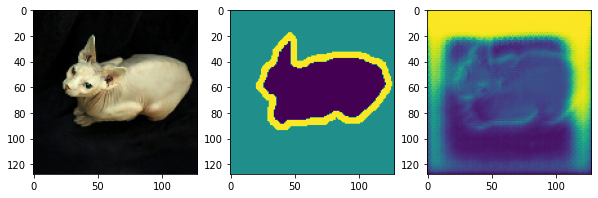

1/1 [==============================] - 0s 81ms/step


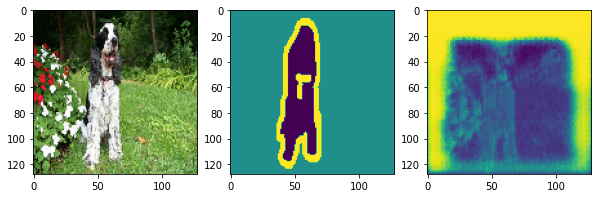

1/1 [==============================] - 0s 67ms/step


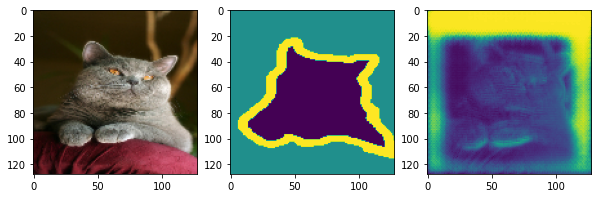

1/1 [==============================] - 0s 92ms/step


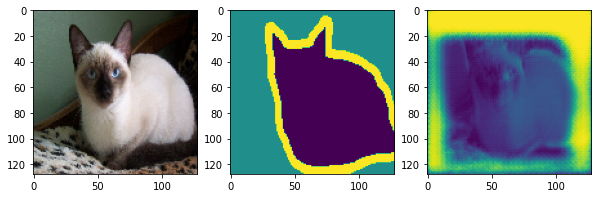

1/1 [==============================] - 0s 66ms/step


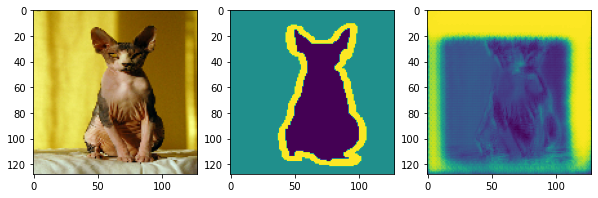

1/1 [==============================] - 0s 63ms/step


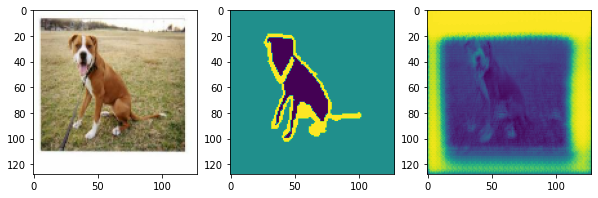

1/1 [==============================] - 0s 83ms/step


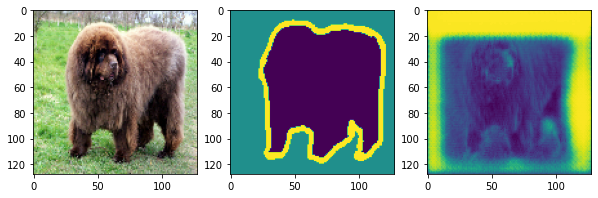

1/1 [==============================] - 0s 69ms/step


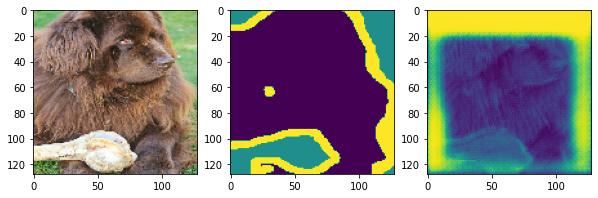

1/1 [==============================] - 0s 70ms/step


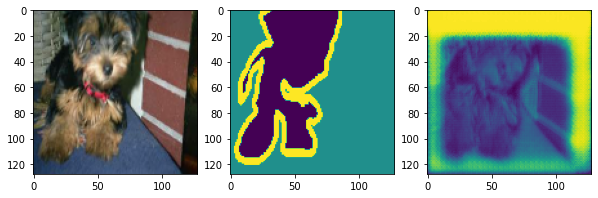

1/1 [==============================] - 0s 92ms/step


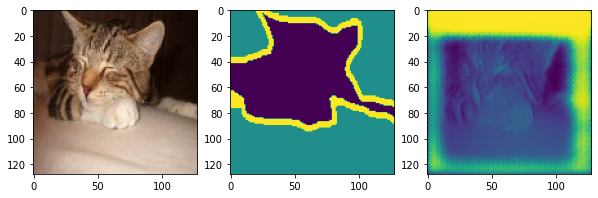

In [27]:
model=tf.keras.models.load_model('first_image_segementor.h5')
image=train_images.take(10)
for i in image:

    fig=plt.figure(1,figsize=(10,10))

    predictions=(np.array(model.predict(np.array(i[0]).reshape(1,128,128,3))).flatten()).reshape(128,128,1)

    for pos in range(len(i)):

      ax=fig.add_subplot(1,3,pos+1)
        
      ax.imshow(tf.keras.utils.array_to_img(i[pos]))

    ax=fig.add_subplot(1,3,pos+2)
      
    ax.imshow(tf.keras.utils.array_to_img(predictions))
    plt.show()



In [ ]:
EPOCHS = 20
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_batches, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_batches,
                          callbacks=[DisplayCallback()])